In [1]:
import glob
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [2]:
DataDir = 'ignore_folder/data'
Categories_all = ['a5df', 'a447', 'a440', 'a476', 'a67e', 'ae61', 
                  'a470', 'a448', 'a9d2', 'a44a', 'a5d0', 'a569', 
                  'acdb', 'a8e2', 'a558', 'a4ce', 'a4f1', 'a4e9', 
                  'a6ca', 'b773', 'ab42', 'a8e4', 'a4e8', 'ad78', 
                  'b944', 'a8c6', 'a6d1', 'a977', 'a57e', 'a8a3', 
                  'a4d2', 'a6b3', 'a8ad', 'a740', 'a8bd', 'a8ae', 
                  'a4a7', 'b3a3', 'a46c', 'a464', 'a656', 'a5fe', 
                  'a455', 'a5c1', 'a658', 'b3be', 'a45d', 'a9fa', 
                  'a46b', 'a9ce', 'a453', 'ac46', 'a454', 'b3bd', 
                  'a5c9', 'a650', 'a668', 'a5fd', 'a5d5', 'a5aa', 
                  'a5db', 'a7da', 'a5a6', 'a475', 'a5bf', 'adfb', 
                  'a474', 'a473', 'afe0', 'a8c3', 'a55b', 'bec7', 
                  'b54c', 'a6e7', 'a4ec', 'a4fb', 'a751', 'a56b', 
                  'b0a8', 'a4f4', 'a6e6', 'a4e2', 'a6e8', 'a4e5', 
                  'a4fd', 'bb50', 'ab48', 'a4c0', 'a4eb', 'b0aa', 
                  'a8e0', 'a6a8', 'a6db', 'bb44', 'b16f', 'a8d3', 
                  'a6b9', 'a540', 'a6d5', 'b0ea', 'aaf8', 'a8a7', 
                  'a4d1', 'a4bd', 'a6b8', 'b6c0', 'a4a3', 'a548', 
                  'a4a4', 'aaf7', 'b160', 'a6d3', 'aaf9', 'aacc', 
                  'a86b', 'aa47', 'a467', 'b1d0', 'a451', 'a45f', 
                  'a5ce', 'a457', 'adab', 'aa46', 'a46a']
IMG_X = 100
IMG_Y = 100

In [3]:
def create_training_data():
    """takes no arguments, accessess data in file and returns it as a list containing [0] a unique id, 
    [1] category, [2] class_type, [3] category + class_type, [4] horizontal average, [5] vertical average, 
    [6] the original image resized to be a 100 X 100 array"""
    data = []
    unique_id = 0
    for category in Categories_all:
        path = os.path.join(DataDir, category)
        class_num = Categories_all.index(category)
        for img in os.listdir(path):
            if 'jinwen' in img:
                class_type = 'jinwen'
            if 'chuxi' in img:
                class_type = 'chuxi'
            if 'smallseal' in img:
                class_type = 'smallseal'
            if 'oracle' in img:
                class_type = 'oracle'
            try:
                img_array = cv2.imread(os.path.join(path,img), 
                                       cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_Y, IMG_X))
                horizontal_average = np.average(new_array, axis=1)
                vertical_average = np.average(new_array, axis=0)
                data.append([unique_id, category, class_type, category + "-" + class_type, 
                             horizontal_average, vertical_average, new_array])
                unique_id += 1
            except Exception as e:
                print('something went wrong')
    return data

In [4]:
complete_data = create_training_data()

In [5]:
complete_data[0][0]

0

In [6]:
complete_data[-1][0]

8231

In [7]:
len(complete_data)

8232

In [8]:
indexed_complete_data = complete_data.copy()

In [9]:
def shuffle(data):
    """takes a list of data as an input and outputs a shuffled list 
    with 100 testing data elements and the rest as training data"""
    random.shuffle(data)
    testing_data = data[-100:]
    training_data = data[0:-100]
    return data, testing_data, training_data

In [10]:
shuffled_data, testing_data, training_data = shuffle(complete_data)

In [11]:
shuffled_data[0][0]

2179

In [12]:
complete_data[0][0]

2179

In [13]:
indexed_complete_data[0][0]

0

In [14]:
shuffled_data[0]

[2179,
 'a8ad',
 'chuxi',
 'a8ad-chuxi',
 array([ 0.  ,  4.65, 11.03, 17.51, 27.84, 38.81, 38.67, 40.95, 44.84,
        44.84, 48.15, 54.81, 57.19, 61.1 , 67.27, 71.56, 72.73, 68.46,
        67.91, 66.96, 62.45, 56.61, 50.73, 46.72, 46.71, 48.33, 46.21,
        45.33, 45.61, 53.97, 61.23, 67.42, 76.11, 81.96, 83.8 , 82.35,
        80.99, 80.68, 77.46, 73.97, 71.65, 69.51, 68.19, 70.03, 78.98,
        90.34, 90.32, 91.49, 92.99, 80.55, 70.05, 61.47, 55.16, 50.7 ,
        48.62, 51.99, 56.13, 60.46, 68.07, 73.09, 69.09, 67.96, 67.47,
        65.17, 50.64, 32.66, 39.02, 40.56, 38.56, 36.49, 38.66, 45.09,
        57.39, 62.91, 58.7 , 58.21, 57.47, 55.33, 47.97, 39.44, 31.11,
        21.25, 12.88, 12.88, 11.42,  9.45,  9.44,  9.44,  9.53, 11.84,
        13.  , 12.99, 10.95,  9.73,  9.72,  7.95,  5.16,  0.83,  0.  ,
         0.  ]),
 array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,  

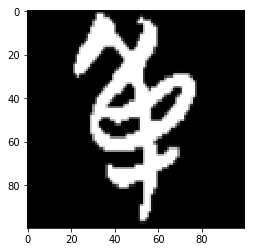

In [15]:
plt.imshow(shuffled_data[0][-1], cmap='gray')

In [16]:
def fingerprint_test(testing, training):
    """Takes our testing data and training data as inputs and returns our closest match for each of the testing images
    based on our 'training' images"""
    guesses = []
    for x in testing:
        best_guess = []
        for y in training:
            best_guess.append([sum(abs(x[4]-y[4])) + sum(abs(x[5]-y[5])), y[0]])
        guess_index = np.argmin([x[0] for x in best_guess])
        guesses.append([x[0], best_guess[guess_index][1]])
    return guesses

In [17]:
%%time
test = fingerprint_test(testing_data, training_data)

CPU times: user 15.2 s, sys: 37.3 ms, total: 15.2 s
Wall time: 15.3 s


In [18]:
def give_score(test):
    """Takes our return object from fingerprint_test and returns the percent accuracy of our model"""
    total = 0
    correct = 0
    for x, y in test:
        if indexed_complete_data[x][1] == indexed_complete_data[y][1]:
            correct += 1
        total += 1
    return correct/total

In [19]:
score = give_score(test)

In [20]:
score

0.58

In [21]:
len(test)

100

In [155]:
test[1]

[2804, 2551]

a4a7-chuxi


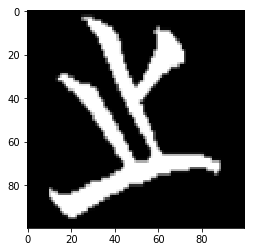

In [156]:
print(indexed_complete_data[test[1][0]][3])
plt.imshow(indexed_complete_data[test[1][0]][-1], cmap='gray')

a4a7-chuxi


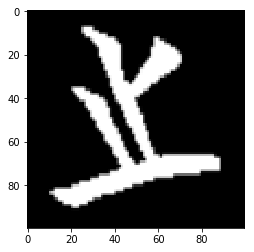

In [157]:
print(indexed_complete_data[test[1][1]][3])
plt.imshow(indexed_complete_data[test[1][1]][-1], cmap='gray')

In [103]:
def run_n_simulations(n, data):
    """Takes the number of simulations n and our original data as an input and shuffles the images n times 
    remember the accuracy of each shuffle then returns the overall percent accuracy a 
    long with the high and low accuracy"""
    all_scores = []
    for _ in range(n):
        shuffled_data, testing_data, training_data = shuffle(complete_data)
        test = fingerprint_test(testing_data, training_data)
        score = give_score(test)
        all_scores.append(score)
    return all_scores

In [26]:
%%time
returned_scores = run_n_simulations(100, complete_data)

CPU times: user 2min 10s, sys: 34.8 ms, total: 2min 10s
Wall time: 2min 10s


In [27]:
sum(returned_scores)/100

0.6700000000000002

### Take a dive into the best_guess list in fingerprint_test

In [158]:
def fingerprint_test_top_values(testing, training):
    """does the same as fingerprint_test but takes a closer look at the best_guess list to see how the function
    is guessing"""
    guesses = []
    for x in testing:
        best_guess = []
        for y in training:
            best_guess.append([sum(abs(x[4]-y[4])) + sum(abs(x[5]-y[5])), y[0], y[3]])
        best_guess.sort(key=lambda x: x[0])
        guesses.append([x[3], x[0], best_guess[:30]])
            
            
            
#         list_of_indexes = np.argpartition([x[0] for x in best_guess], range(5))[:5]
#         guesses.append([x[3], [indexed_complete_data[x][3] for x in list_of_indexes]])
    return guesses

In [159]:
%%time
top_five = fingerprint_test_top_values(testing_data, training_data)

CPU times: user 13.6 s, sys: 4.69 ms, total: 13.6 s
Wall time: 13.6 s


In [160]:
new_top_five = []
for results in top_five:
    possibilities = []
    first_choice = results[2][0]
    for value in results[2]:
        if value[0] <= 1.2*first_choice[0]:
            possibilities.append(value)
    new_top_five.append([results[0], results[1], possibilities])

In [161]:
top_five[2]

['a4a3-chuxi',
 6788,
 [[1458.3400000000006, 6802, 'a4a3-chuxi'],
  [1682.8999999999999, 6774, 'a4a3-chuxi'],
  [1692.9000000000005, 6807, 'a4a3-chuxi'],
  [1777.0, 6787, 'a4a3-chuxi'],
  [1809.2200000000003, 6757, 'a4a3-chuxi'],
  [1863.6399999999999, 6747, 'a4a3-chuxi'],
  [1912.7800000000007, 6761, 'a4a3-chuxi'],
  [2092.52, 6784, 'a4a3-chuxi'],
  [2105.92, 6833, 'a4a3-chuxi'],
  [2113.5200000000004, 6813, 'a4a3-chuxi'],
  [2154.5, 6750, 'a4a3-chuxi'],
  [2167.899999999999, 6775, 'a4a3-chuxi'],
  [2206.22, 6771, 'a4a3-chuxi'],
  [2222.88, 6751, 'a4a3-chuxi'],
  [2250.0600000000004, 6834, 'a4a3-chuxi'],
  [2293.320000000001, 6786, 'a4a3-chuxi'],
  [2319.340000000001, 2265, 'a8ae-chuxi'],
  [2323.6800000000003, 6763, 'a4a3-chuxi'],
  [2366.3999999999996, 6091, 'b16f-chuxi'],
  [2368.2400000000002, 6743, 'a4a3-chuxi'],
  [2379.3999999999996, 6776, 'a4a3-chuxi'],
  [2403.8799999999997, 6089, 'b16f-chuxi'],
  [2408.46, 6789, 'a4a3-chuxi'],
  [2421.6400000000003, 6803, 'a4a3-chuxi'],
  [2

In [128]:
top_five[1]

['aaf7-chuxi',
 7253,
 [[1802.88, 7308, 'aaf7-chuxi'],
  [2137.739999999999, 7267, 'aaf7-chuxi'],
  [2336.38, 7258, 'aaf7-chuxi'],
  [2430.4000000000005, 7324, 'aaf7-chuxi'],
  [2476.9199999999996, 7168, 'a4a4-chuxi'],
  [2492.7000000000003, 1999, 'a977-chuxi'],
  [2516.8199999999997, 3896, 'b3bd-chuxi'],
  [2522.4199999999996, 7257, 'aaf7-chuxi'],
  [2536.7599999999993, 7315, 'aaf7-chuxi'],
  [2615.0, 1986, 'a977-chuxi'],
  [2638.5799999999995, 7218, 'aaf7-chuxi'],
  [2663.2, 7307, 'aaf7-chuxi'],
  [2679.5999999999995, 3944, 'b3bd-chuxi'],
  [2695.2000000000007, 7243, 'aaf7-chuxi'],
  [2703.260000000001, 6657, 'b6c0-chuxi'],
  [2717.24, 5256, 'a6e8-jinwen'],
  [2722.3400000000006, 2004, 'a977-chuxi'],
  [2726.2799999999997, 2000, 'a977-chuxi'],
  [2746.260000000001, 1983, 'a6d1-chuxi'],
  [2761.3000000000006, 1984, 'a977-chuxi'],
  [2768.62, 3925, 'b3bd-chuxi'],
  [2769.0599999999995, 3888, 'b3bd-chuxi'],
  [2799.5800000000004, 3926, 'b3bd-chuxi'],
  [2808.340000000001, 7210, 'aaf7-ch

In [162]:
new_top_five

[['b54c-jinwen',
  4725,
  [[1795.12, 4716, 'b54c-jinwen'], [2119.2600000000007, 5278, 'a6e8-oracle']]],
 ['a4a7-chuxi',
  2804,
  [[1746.6599999999999, 2551, 'a4a7-chuxi'],
   [1795.9000000000005, 2993, 'a4a7-chuxi'],
   [1893.9200000000003, 2439, 'a4a7-chuxi'],
   [1976.2400000000002, 2832, 'a4a7-chuxi'],
   [2001.6399999999999, 2755, 'a4a7-chuxi'],
   [2022.7200000000005, 2474, 'a4a7-chuxi'],
   [2062.4, 2626, 'a4a7-chuxi']]],
 ['a4a3-chuxi',
  6788,
  [[1458.3400000000006, 6802, 'a4a3-chuxi'],
   [1682.8999999999999, 6774, 'a4a3-chuxi'],
   [1692.9000000000005, 6807, 'a4a3-chuxi']]],
 ['a5d0-jinwen',
  1086,
  [[1769.7200000000003, 1092, 'a5d0-jinwen'], [1896.46, 1122, 'a5d0-jinwen']]],
 ['a7da-jinwen',
  4276,
  [[1699.24, 4643, 'bec7-oracle'],
   [1785.1000000000004, 592, 'a67e-jinwen'],
   [1825.7200000000007, 6166, 'a6b9-oracle'],
   [1911.4800000000002, 1000, 'a448-chuxi'],
   [1964.04, 3624, 'a453-chuxi'],
   [1993.5199999999995, 3605, 'a453-chuxi'],
   [2018.0799999999995, 3

In [167]:
new_top_five[4]

['a7da-jinwen',
 4276,
 [[1699.24, 4643, 'bec7-oracle'],
  [1785.1000000000004, 592, 'a67e-jinwen'],
  [1825.7200000000007, 6166, 'a6b9-oracle'],
  [1911.4800000000002, 1000, 'a448-chuxi'],
  [1964.04, 3624, 'a453-chuxi'],
  [1993.5199999999995, 3605, 'a453-chuxi'],
  [2018.0799999999995, 3598, 'a453-chuxi'],
  [2029.7199999999998, 4776, 'a6e7-jinwen']]]

In [171]:
wrong_guess = []
for values in new_top_five:
    if values[0] != values[2][0][2]:
        wrong_guess.append(values)

In [172]:
wrong_guess

[['a7da-jinwen',
  4276,
  [[1699.24, 4643, 'bec7-oracle'],
   [1785.1000000000004, 592, 'a67e-jinwen'],
   [1825.7200000000007, 6166, 'a6b9-oracle'],
   [1911.4800000000002, 1000, 'a448-chuxi'],
   [1964.04, 3624, 'a453-chuxi'],
   [1993.5199999999995, 3605, 'a453-chuxi'],
   [2018.0799999999995, 3598, 'a453-chuxi'],
   [2029.7199999999998, 4776, 'a6e7-jinwen']]],
 ['a454-jinwen',
  3841,
  [[1853.0200000000002, 3846, 'a454-chuxi'],
   [1867.88, 3858, 'a454-chuxi'],
   [1912.5, 3851, 'a454-chuxi']]],
 ['aaf7-jinwen',
  7223,
  [[2893.559999999999, 2005, 'a977-chuxi'],
   [3034.2000000000007, 2001, 'a977-chuxi'],
   [3125.4799999999996, 7256, 'aaf7-smallseal'],
   [3272.1600000000008, 8212, 'a46a-jinwen'],
   [3273.5, 3913, 'b3bd-chuxi'],
   [3287.3, 12, 'a5df-jinwen'],
   [3302.54, 4245, 'a5aa-jinwen'],
   [3303.800000000001, 4922, 'a56b-jinwen'],
   [3311.300000000001, 1983, 'a6d1-chuxi'],
   [3373.38, 4246, 'a5aa-jinwen'],
   [3388.1799999999994, 5375, 'a4e5-jinwen'],
   [3395.3, 38